# Ungraded Lab: First Autoencoder

In this lab, you will build your first simple autoencoder. This will take in three-dimensional data, encodes it to two dimensions, and decodes it back to 3D.

## Imports

In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## Prepare and preview the dataset

You will first create a synthetic dataset to act as input to the autoencoder. You can do that with the function below.

In [2]:
def generate_data(m):
    '''plots m random points on a 3D plane'''

    angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
    data = np.empty((m, 3))
    data[:,0] = np.cos(angles) + np.sin(angles)/2 + 0.1 * np.random.randn(m)/2
    data[:,1] = np.sin(angles) * 0.7 + 0.1 * np.random.randn(m) / 2
    data[:,2] = data[:, 0] * 0.1 + data[:, 1] * 0.3 + 0.1 * np.random.randn(m)
    
    return data

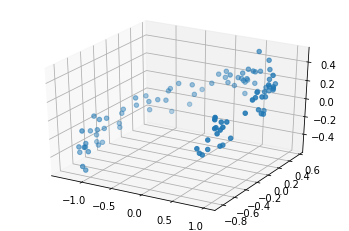

In [3]:
# use the function above to generate data points
X_train = generate_data(100)
X_train = X_train - X_train.mean(axis=0, keepdims=0)

# preview the data
ax = plt.axes(projection='3d')
ax.scatter3D(X_train[:, 0], X_train[:, 1], X_train[:, 2], cmap='Reds');

## Build the Model

Now you will build the simple encoder-decoder model. Notice the number of neurons in each Dense layer. The model will contract in the encoder then expand in the decoder.

In [4]:
encoder = keras.models.Sequential([keras.layers.Dense(2, input_shape=[3])])
decoder = keras.models.Sequential([keras.layers.Dense(3, input_shape=[2])])

autoencoder = keras.models.Sequential([encoder, decoder])

## Compile the Model

You can then setup the model for training.

In [5]:
autoencoder.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=0.1))

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


## Train the Model

You will configure the training to also use the input data as your target output. In our example, that will be `X_train`.

In [6]:
history = autoencoder.fit(X_train, X_train, epochs=200)

Epoch 1/200
4/4 [==============================] - 3s 4ms/step - loss: 1.0278
Epoch 2/200
4/4 [==============================] - 0s 4ms/step - loss: 0.4658
Epoch 3/200
4/4 [==============================] - 0s 4ms/step - loss: 0.3074
Epoch 4/200
4/4 [==============================] - 0s 4ms/step - loss: 0.2324
Epoch 5/200
4/4 [==============================] - 0s 4ms/step - loss: 0.1799
Epoch 6/200
4/4 [==============================] - 0s 4ms/step - loss: 0.1400
Epoch 7/200
4/4 [==============================] - 0s 4ms/step - loss: 0.1132
Epoch 8/200
4/4 [==============================] - 0s 4ms/step - loss: 0.0942
Epoch 9/200
4/4 [==============================] - 0s 5ms/step - loss: 0.0823
Epoch 10/200
4/4 [==============================] - 0s 4ms/step - loss: 0.0731
Epoch 11/200
4/4 [==============================] - 0s 4ms/step - loss: 0.0671
Epoch 12/200
4/4 [==============================] - 0s 4ms/step - loss: 0.0619
Epoch 13/200
4/4 [==============================] - 0s 3ms/st

## Plot the encoder output

As mentioned, you can use the encoder to compress the input to two dimensions.

In [7]:
# encode the data
codings = encoder.predict(X_train)

# see a sample input-encoder output pair
print(f'input point: {X_train[0]}')
print(f'encoded point: {codings[0]}')

input point: [-0.43097084  0.31249711 -0.13369098]
encoded point: [0.18843202 0.3865938 ]


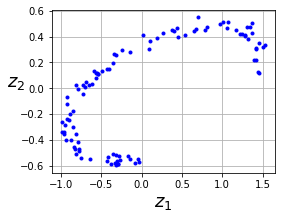

In [8]:
# plot all encoder outputs
fig = plt.figure(figsize=(4,3))
plt.plot(codings[:,0], codings[:, 1], "b.")
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18, rotation=0)
plt.grid(True)
plt.show()

## Plot the Decoder output

The decoder then tries to reconstruct the original input. See the outputs below. You will see that although not perfect, it still follows the general shape of the original input.

In [9]:
# decode the encoder output
decodings = decoder.predict(codings)

# see a sample output for a single point
print(f'input point: {X_train[0]}')
print(f'encoded point: {codings[0]}')
print(f'decoded point: {decodings[0]}')

input point: [-0.43097084  0.31249711 -0.13369098]
encoded point: [0.18843202 0.3865938 ]
decoded point: [-0.46070373  0.27460995  0.05077352]


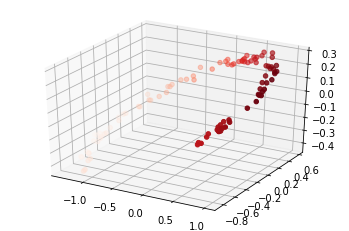

In [10]:
# plot the decoder output
ax = plt.axes(projection='3d')
ax.scatter3D(decodings[:, 0], decodings[:, 1], decodings[:, 2], c=decodings[:, 0], cmap='Reds');

That's it for this simple demonstration of the autoencoder!